In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## 載入鳶尾花數據庫

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
x=iris.data
y=iris.target

In [6]:
x[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [7]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 只取後兩行

In [8]:
X=x[:, 2:4]

In [9]:
Y=y

In [10]:
len(X)

150

### 區分訓練資料、測試資料

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train , y_test= train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=0)

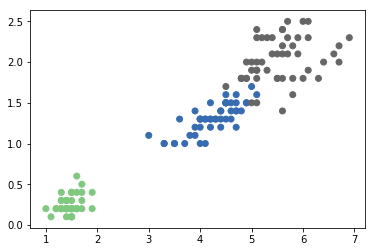

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent')

### Step 1. 開一台函數學習機

In [24]:
clf=SVC()

### Step 2. 訓練

In [25]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Step 3. 預測

In [26]:
y_predict=clf.predict(x_test)

In [27]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [28]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [29]:
# 查看相異程度
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

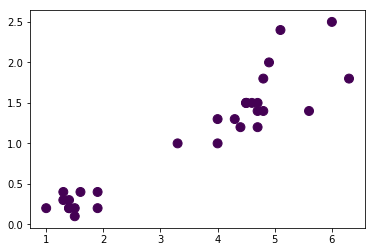

In [31]:
# 畫圖
plt.scatter(x_test[:,0],x_test[:,-1],c=y_predict-y_test,s=80)

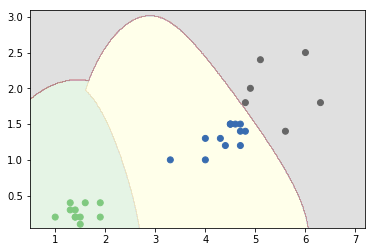

In [37]:
x0=np.arange(0.5,7.2,0.01)
y0=np.arange(0.05,3.1,0.01)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap="Accent",alpha=0.2) 

plt.scatter(x_test[:,0],x_test[:,1],cmap='Accent',c=y_test)

## 可得出預測很精準